# Part 1 Conceptual Car-following Model Based on Discrete-Time Markov Chain (DTMC)  

## Vehicle acceleration model

A fundamental assumption of most car-following models is that the vehicle is going to adopt a maximum acceleration to reach the desired speed (or the speed limit) if there is no other vehicle ahead. The car-following behaviors are thus heavily dependent on modeling maximum accelerations. With the instantaneous speed increases, the maximum acceleration decreases, due to the power limit of the engine. Based on empirical data, a linear relationship between the vehicle acceleration and instantaneous speed is implemented: 

\begin{equation}\label{acceleration}
	a(v)= (v_c-v(t))\ \beta,
\end{equation}

where $v_c$ is the target speed and $\beta$ is the inverse relaxation time.  The relationship is shown in the figure below.

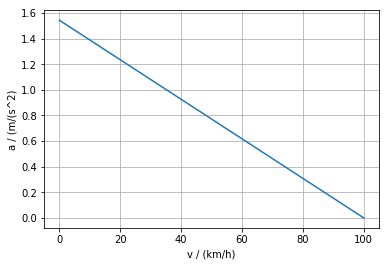

In [6]:
import matplotlib.pyplot as plt
import numpy as np
b = 200 #h^-1
vc = 100 #km/h  free flow speed
v = np.linspace(0, 100)
a = (vc - v) * b * 1000 / (3600 * 3600)    # m/(s^2)
# plot results
plt.plot(v,a)
plt.xlabel('v / (km/h)')
plt.ylabel('a / (m/(s^2)')
plt.grid()
plt.show()

**Exercise 1** (2 points) Change the value of $\beta$ to 250 hour^-1, and see how it influences the v-a relationship. What physical meaning can you assume $\beta$ to represent? 

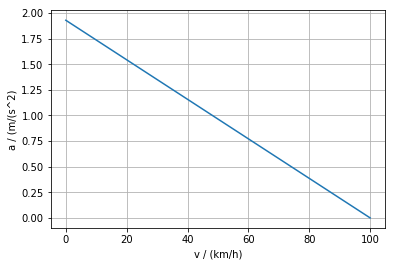

In [7]:
import matplotlib.pyplot as plt
import numpy as np
b = 250 #h^-1
vc = 100 #km/h  free flow speed
v = np.linspace(0, 100)
a = (vc - v) * b * 1000 / (3600 * 3600)    # m/(s^2)
# plot results
plt.plot(v,a)
plt.xlabel('v / (km/h)')
plt.ylabel('a / (m/(s^2)')
plt.grid()
plt.show()

With a larger $\beta$, the accelerations at the same speed are also larger.  $\beta$ probably represents the accelerating performance of the vehicle. With a better engine, a smaller vehicle weight, and good road condition, the vehicle is able to accelerate faster. Whether the driver is aggresive or not is also a factor that to be considered here. 

The distance travelled in time $t$, $\xi(t)$, can be solved with the ODE: 


\begin{equation}
		d\xi(t)=v(t) dt,\hskip 5mm \xi(0)=0,
\end{equation}

\begin{equation}
		dv(t)=(v_c-v(t))\beta dt,\hskip 5mm v(0)=v_0,
\end{equation}


By solving the ODE, a vehicle acceleration process from a complete stop can be drawn as: 

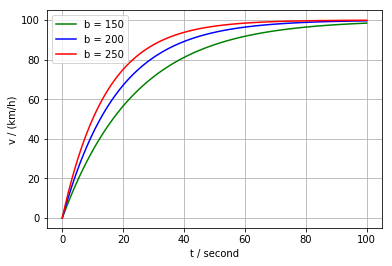

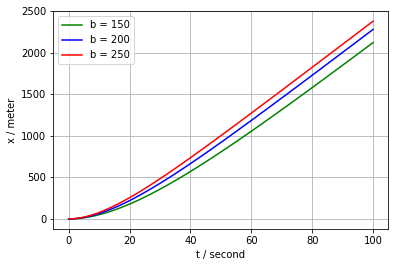

In [8]:
from scipy.integrate import odeint
def acc(y, t, b):
        position, speed = y
        dydt = [speed / 3.6, b * (vc - speed) / 3600]
        return dydt
    
vc = 100 # km/h  target speed
    
y0 = [0, 0.0]
t = np.linspace(0, 100, 101)
from scipy.integrate import odeint
b = 150
sol0 = odeint(acc, y0, t, args=(b,))
b = 200
sol1 = odeint(acc, y0, t, args=(b,))
b = 250
sol2 = odeint(acc, y0, t, args=(b,))
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(t, sol0[:, 1], 'g', label='b = 150')
plt.plot(t, sol1[:, 1], 'b', label='b = 200')
plt.plot(t, sol2[:, 1], 'r', label='b = 250')
plt.legend(loc='best')
plt.xlabel('t / second')
plt.ylabel('v / (km/h)')
plt.grid()

plt.figure(2)
plt.plot(t, sol0[:, 0], 'g', label='b = 150')
plt.plot(t, sol1[:, 0], 'b', label='b = 200')
plt.plot(t, sol2[:, 0], 'r', label='b = 250')
plt.legend(loc='best')
plt.xlabel('t / second')
plt.ylabel('x / meter')
plt.grid()
plt.show()

## The Discrete Time Markov Chain (DTMC) Vehicle Acceleration Model

A Markov chain models a series of events where the probability of each event depends only on the state of the previous event.  A discrete-time stochastic process $X_0$, $X_1$, $X_2$,... is called a discrete-time Markov Chain (DTMC) if:

\begin{equation}\label{dtmc}
P(X_{n+1} \mid X_n=x_n,x_{n-1}=x_{n-1},...X_0=x_0)=P(X_{n+1}|X_n=x_n)
\end{equation}

In traffic simulation, $X_i$ usually includes the positions and velocities of all the vehicles in the system at state $i$.  We can implement DTMC with a typical time step 1.2 second.  If we want to run the simulation for 120 seconds, we can denote $t=0$ as state 0, $t=1.2$ second as state 1, ... $t=1.2n$ second as state n ... and $t=120$ seconds as state 100. 

In the model, we need to identify the probability matrix of the DTMC, that is, given the status of state $i$ of the simulation, we need to identify the distribution of the vehicle speed and position of state $i+1$.  In the previous part, we have seen how a vehicle accelerates given the initial speed and position.  Now, we are going to add a white noise to the acceleration term of the accleration model, such that we can use DTMC to analyse the system.  The updated function is given by:

\begin{equation}
		d\xi(t)=v(t) dt,\hskip 5mm \xi(0)=0,
\end{equation}

\begin{equation}
		dv(t)=(v_c-v(t))\beta dt + \sigma W(t),\hskip 5mm v(0)=v_0,
\end{equation}

where $W(t)$ is a standard Brownian Motion and $\sigma^2$ is the diffusion coefficient. The diffusion coefficient has a typical value range of 75 to 300.

Given the vehicle speed $v_0$ and position $x_0$ at state $i$, the vehicle speed and position at state $i+1$ can be predicted as $v(t)$ and $x_0+\xi(t)$, with $t=1.2$ second.  According to central limit theorem, $v(t)$ and $\xi(t)$ follows a normal distribution with:

\begin{equation}
		E[v(t)]= v_0e^{-\beta t}+ v_c\left(1-e^{-\beta t}\right)
\end{equation}
\begin{equation}
		V[v(t)]=\frac{\sigma^2}{2\beta }(1- e^{-2 \beta t})
\end{equation}
\begin{equation}
		E[\xi(t)]= v_ct-\left(1-e^{-\beta t}\right)(v_c-v_0)/ \beta
\end{equation}
\begin{equation}
		V[\xi(t)]=\frac{\sigma^2}{2\beta^{3}}\left( e^{-\beta t} (4-e^{-\beta t})+2\beta   t-3\right)
\end{equation}




## The Following Behaviors due to the Constrain of the Leader

Notice that following vehicle sometimes cannot accelerate freely due to the constrain of a leading vehicle, and has to keep a safe distance with the leader. Therefore, the position of the following vehicle is a trade-off between the desire to accelerate (refer to the acceleration model we just discussed) and the need to break.  The proposed model can be formulated as:

\begin{equation}\label{cf}
x_{j}(t)=\min\{\underbrace{x_{j}(t-\tau)+ \xi_{j}(\tau)}_{\text{desire to accelerate }},\ \underbrace{x_{j-1}(t-\tau)-\delta}_{\text{need to break }} \},
\end{equation}

where $x_j(t)$ is the position of vehicle $j$ at time $t$, $\tau$ in our case is 1.2 second, $\delta$ is the jam spacing with a typical value of 6.67 meters (with a jam density of 150 veh/km).

Please note that the car-following model only describes the interaction between two vehicles, with the vehicle trajectories of the leader as input, and the follower's trajectories as the output. However, the model can actually be used to simulate any size of platoons by simply implementing a loop of the input/output. For example, the 2nd vehicle in the platoon is not only a follower to the 1st vehicle (output), but also a leader to the 3rd vehicle (input).  

## System Settings and Simulation Configurations

The car-following model is a fundamental model of traffic simulation and can be applied to various scales of scenarios. One can even use the car-following model to conduct a network-level analysis. In this case, we will set the simulation scale to a single traffic lane with limited length.

Before we can actually start the simulation, numerous configurations have to be made, including setting the fundamental parameters and the initial conditions. We need to specify the size of the simulated platoon, the length of the road, the desired speed, etc. We also need the initial conditions to describe the positions/speed/acceleration of each vehicle at the start of the simulation. 

Here we a 100-car simulation on a 2-km road as an example.  

At $t=0$ (state 0 of the DTMC), 100 vehicles are generated on the road with initial speed 0.  The first vehicle is at $x=0$ m, second vehicle is at $x=-𝛿=-6.67$ m, the $n$ th vehicle is at $x=-6.67(n-1)$ m. In this tutorial, negative positions do make sense, since the origin simply indicates the starting point of the first vehicle. To update the system for $t=1.2$ s (state 1 of the DTMC), one need to generate random variables $\xi_j(\tau)$ for $j=1, 2,..., 100$ to describe the stochastic displacement, where $\tau=1.2$ s is the simulation step.  Then the position of the first vehicle at $t=1.2$ s is simply $x_1(1.2)=x_1(0)+\xi_1(\tau)=\xi_1(\tau)$ as it is not constrained by any other vehicle.  For the rest of vehicles, the position is determined by:

\begin{equation}
x_j(1.2)=\min\{x_j(0)+\xi_j(\tau),x_{j-1}(0)-\delta\}
\end{equation}

We also need to record the vehicle speeds $v_j(t)$ at $t=1.2$ s.  The speeds $v_j(t)$ are to be used to generate random variables $\xi_j(\tau)$ for the transition from $t=1.2$ s to $t=2.4$ s.  The vehicle speeds $v_j(t)$ at $t=1.2$ s can be calculated after we have generated the vehicle positions $v_j(1.2)=\frac{x_j(1.2)-x_j(0)}{1.2}$.

When a vehicle passes the entire road (2000 meters in this case) in the simulation, it is considered to have reached the destination (or, entering another system), and is thus removed from future simulation. That is to say, its trajectories will no longer be generated, and the following-leading relationship is also released. Since no overtaking is allowed in the simulation, the removal of the vehicles will happen in the exact sequence as the start of the simulation. For example, when the 1st vehicle reaches the destination, its trajectories will no longer be generated for the next state, and the 2nd vehicle will have no constrain from the leader any more. 

Follow this way, the rest of the simulation can be completed when all the vehicles finish the 2-km travel.  

# Part 2 Python-based Car-following Simulation of DTMC

This part presents an example of the implementation of the car-following model based on DTMC in Python. The objective of the simulation is to generate the trajectories of all the 100 vehicles, and to illustrate the vehicle-specific time-distance diagrams as a demonstration. The assumptions, model mechanism, scale of the scenario, configurations and initial conditions are all described in the previous part. 

## Classes of Setting, Trajectory, and Car

Before we actually start coding, we need an overall framework. To make the codes concise, and debugging/maintenance easy, we are going to define one main function (to call the simulation, with a corresponding setting), based on three classes (setting, trajectory, and car).  

The first step is to set the configurations of the simulation. Here we are using a class to store all the settings, so that a whole set of the configurations can be represent by one single object. It is also convenient to change the values, since every variable is public. Using numerous separate variables is also an option, but when doing multiple simulations with different settings, it will be cumbersome to change the variables every time. 

Another bonus of using a setting class in this case is the calculation of the standard deviation of the random displacement. Since the standard deviation is only related to $\sigma$, it is actually a setting-dependent variable. That is, for a fixed set of configurations, the standard deviation of the random displacement is constant.

One thing that worthing noting here is the conversion of the units. We should always pay attention to the differences between km and m, and hour and second. Another tip is to split the complex calculation into several steps, so that it is easier to debug. 

The codes of defining the setting class is shown below.  

In [24]:
import math


class MarkovSetting(object):
    def __init__(self):
        self.simulationTimeStep = 1.2  # in sec
        self.beta = 250
        self.targetSpeed = 100  # in km/h
        self.jamDensity = 150  # veh/km
        self.jamSpacing = 1 / self.jamDensity * 1000
        self.sigmaDimensionless = 0.02 # Sigma will be calculated from this one
        self.roadLength = 2000  # in meter
        self.SD = self.calculateStandardDeviation()
        self.sigma = self.sigmaDimensionless * math.sqrt(self.beta) * self.targetSpeed

    def calculateStandardDeviation(self):
        denominator = math.sqrt(2)
        self.sigma = self.sigmaDimensionless * math.sqrt(self.beta) * self.targetSpeed # typically range of 75 to 300
        numeratorNumerator = 3 + math.exp(-2 * self.simulationTimeStep / 3600 * self.beta) - 4 * math.exp(
            -1 * self.simulationTimeStep / 3600 * self.beta) - 2 * self.simulationTimeStep / 3600 * self.beta
        numeratorDenominator = -1 * self.beta * self.beta * self.beta
        numerator = math.sqrt((numeratorNumerator / numeratorDenominator)) * self.sigma
        return numerator / denominator * 1000

defaultSetting = MarkovSetting()

We then need to create a class of trajectory, which include the information of position, speed, and acceleration. We also recommend including the positions based on desired acceleration and leader constrain respectively, which are necessary variables in the last step of the position calculation. It is no harm to keep a record of media variables in the middle of the simulation, for the convenience of debugging. 
The last step of the position calculation is simple, which can be easily implemented by a $min$ function. Let’s include it here too. 

In [10]:
class trajectory(object):
    def __init__(self, initialPosition=0, initialSpeed=0, initialAcceleration=0):
        self.speed = initialSpeed  # in km/h
        self.position = initialPosition  # in meter
        self.acceleration = initialAcceleration  # in m/s^2
        self.expectedDeisiredPosition = 0  # in meter
        self.deviatedDisplacement = 0  # in meter
        self.constrainedPosition = 0  # in meter
        self.desiredPosition = 0  # in meter

    def updatePosition(self):
        self.position = min(self.desiredPosition, self.constrainedPosition)

Before we can get into the details of the model calculation, we need to define a function that generates the normal-distributed random displacement from the standard deviation and the expected displacement (the mean value). A trick here is to set the seed based on milliseconds rather than seconds, since we are probably going to generate more than one random number within one-second (the simulation of one vehicle takes less than one-second in this case). The seed only takes number between 0 and 2^32-1, so we need to take the remainder here. 

In [11]:
import numpy as np
import time


def randomDisplacementDeviation(mean, SD):
    t = int(round(time.time() * 1000)) % 4294967296
    np.random.seed(t)
    res = np.random.normal(mean, SD, 1)
    if res[0] < 0:
        res[0] = 0
    return res[0]

Now let’s look at the last class, which include all the cumbersome calculations. We need to attach the attribute of leader and setting to the class of car, and use a list to store all its trajectories. There is not much to talk about in the calculation, except the constrained position. When the follower is not constrained by the leader (either when it is the first car, or when the leader has exited the road), the constrained position is set to infinite (twice the road length). In this way we do not have to define a separate function for unconstrained followers. 

In [12]:
class carMarkov(object):
    def __init__(self, objectiveSetting = defaultSetting, initialPosition=0, initialSpeed=0, initialAcceleration=0):
        self.trajectories = []
        newTrajectory = trajectory(initialPosition, initialSpeed, initialAcceleration)
        self.trajectories.append(newTrajectory)
        self.currentTrajectory = newTrajectory # use this as the current position and speed
        self.leader = None # attached later
        self.currentStateID = 0
        self.setting = objectiveSetting

    def desiredNewPosition(self, newTrajectory):

        # desired speed calculated in 2 steps
        desiredDisplacement = self.currentTrajectory.speed - self.setting.targetSpeed + (
                (self.setting.targetSpeed - self.currentTrajectory.speed) * math.exp(
            -1 * self.setting.simulationTimeStep / 3600 * self.setting.beta)) + (
                                      self.setting.simulationTimeStep / 3600 * self.setting.targetSpeed * self.setting.beta)  # divider
        desiredDisplacement = desiredDisplacement / self.setting.beta  # in km

        # desired position with random variance
        newTrajectory.expectedDeisiredPosition = self.currentTrajectory.position + (desiredDisplacement * 1000)
        newTrajectory.deviatedDisplacement = randomDisplacementDeviation((desiredDisplacement * 1000), self.setting.SD)

        newTrajectory.desiredPosition = self.currentTrajectory.position + newTrajectory.deviatedDisplacement

    def constrainedNewPosition(self, newTrajectory):
        if self.leader is not None:
            if self.currentStateID == 0:
                newTrajectory.constrainedPosition = self.currentTrajectory.position
            elif len(self.leader.trajectories) >= self.currentStateID:
                newTrajectory.constrainedPosition = self.leader.trajectories[
                                                        self.currentStateID - 1].position - self.setting.jamSpacing
            else:
                newTrajectory.constrainedPosition = 2 * self.setting.roadLength # this is basically infinite
        else:
            newTrajectory.constrainedPosition = 2 * self.setting.roadLength # this is basically infinite

    def newPosition(self, newTrajectory):
        newTrajectory.updatePosition()
        newTrajectory.speed = (
                                      newTrajectory.position - self.currentTrajectory.position) / self.setting.simulationTimeStep * 3.6
        self.currentTrajectory.acceleration = newTrajectory.speed - self.currentTrajectory.speed

    def update(self):
        newTrajectory = trajectory(self.currentTrajectory.position)
        self.desiredNewPosition(newTrajectory)
        self.constrainedNewPosition(newTrajectory)
        self.newPosition(newTrajectory)
        self.trajectories.append(newTrajectory)
        self.currentStateID += 1
        self.currentTrajectory = self.trajectories[self.currentStateID]
        if self.currentTrajectory.position > self.setting.roadLength:
            return False # it needs to exit the simulation
        else:
            return True # it stays in the system

Now we need a “main” function to launch the simulation. The parameters of the function include the number of vehicles in the simulation, and an object of the configuration class. Here we are doing the calculation in a car-by-car sequence. It is also fine to do it in a time-series way (state-by-state). The function also include the illustration of the time-distance diagram, with the help of the matplotlib package.  

In [17]:
import matplotlib.pyplot as plt

def simMain(aimSetting, numberOfCars):
    cars = []
    initialSpeed = 0
    initialAcceleration = 0
    initialPosition = 0
    aimSetting.SD = aimSetting.calculateStandardDeviation() # calculate the SD again, in case sigma changed

    for i in range(numberOfCars):
        # initialization of the car
        newCar = carMarkov(aimSetting, initialPosition, initialSpeed, initialAcceleration)
        newCar.setting = aimSetting
        if i > 0:
            newCar.leader = cars[i - 1]  # attach the leader
        initialPosition -= aimSetting.jamSpacing  # initial position
        flag = True  # on the road

        # while loop
        while flag:
            flag = newCar.update()

        # put the car in array
        cars.append(newCar)

    maxTrajectoryLength = 0
    for i in range(len(cars)):
        if len(cars[i].trajectories) > maxTrajectoryLength:
            maxTrajectoryLength = len(cars[i].trajectories)

    # let us prepare the plot
    timeSeries = []
    for j in range(maxTrajectoryLength):
        timeSeries.append(j * aimSetting.simulationTimeStep)

    # the positions
    plotPositions = [[] for i in range(len(cars))]
    for j in range(maxTrajectoryLength):
        for i in range(len(cars)):
            if j < len(cars[i].trajectories):
                plotPositions[i].append(cars[i].trajectories[j].position)
            else:
                plotPositions[i].append(cars[i].trajectories[len(cars[i].trajectories) - 1].position)

    # plot
    for i in range(len(cars)):
        plt.plot(timeSeries, plotPositions[i])
    plt.ylim([initialPosition, aimSetting.roadLength])

    plt.xlabel('Simulation Time (s)')
    plt.ylabel('Distance (m)')
    plt.title('Time-Distance Diagram of ' + str(numberOfCars) + ' Cars with Sigma of ' + str(round(aimSetting.sigma,2)))
    plt.show()

Finally, we can actually run the simulation and show the trajectories! Here is an example of a 100-car simulation, with $\sigma= 1$.  

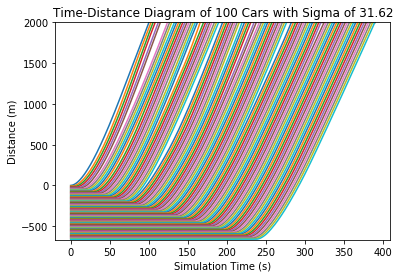

In [18]:
defaultSetting = MarkovSetting()
simMain(defaultSetting, 100)

This is a very good diagram with significant traffic wave, or stop wave. It travels backwards relative to the vehicle trajectories, which is a type of traffic jam. 

**Exercise 2** (3 point) Change the number of vehicles to 15 to provide a detailed view of the trajectories. What is the pattern of the trajectories? What does it indicate physically?

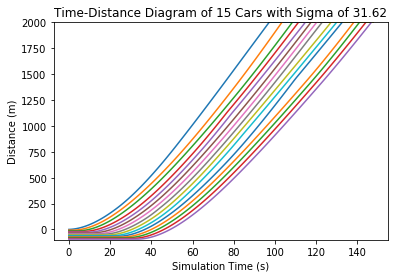

In [19]:
defaultSetting = MarkovSetting()
simMain(defaultSetting, 15)

As shown in the figure, the trajectories are mostly parallel across the cars. This is probably due to the small value of $\sigma$. It represents a stable traffic flow where every vehicle is almost repeating the leader’s trajectories. 

**Exercise 3** (4 point) Change the value of $\sigma$ to other values (by adjusting the dimensionless $\sigma$ in the setting class). See how the stochastic disturbance influence the traffic flow. 

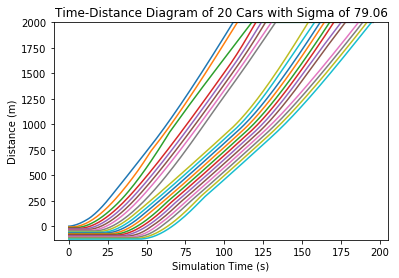

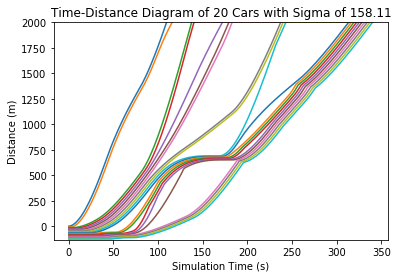

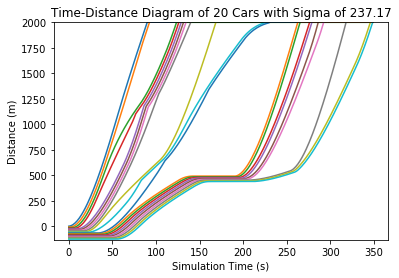

In [28]:
newSetting = MarkovSetting()

# try .05
newSetting.sigmaDimensionless = 0.05
simMain(newSetting, 20)

# try .1
newSetting.sigmaDimensionless = 0.1
simMain(newSetting, 20)

# try .15
newSetting.sigmaDimensionless = 0.15
simMain(newSetting, 20)

It is indicated that when $\sigma$ is large, there is a large disturbance in the traffic flow, which will decrease the capacity of the system (the vehicles take longer to finish the trips). To maximum the efficiency of the system, parallel trajectories are necessarily needed, when every vehicle is almost repeating the leader’s trajectories. If the reader is interested, this is also the case for railway operation management when developing the schedule map of the trains.